# SUBJECT CLASSIFICATION

# IMPORTING REQUIRED PACKAGES

In [178]:
import pandas as pd
import math
from sklearn.datasets import load_files
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk import FreqDist
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import label_binarize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,roc_auc_score,plot_roc_curve,roc_curve,auc,f1_score

READING THE DATA

In [179]:
df=pd.read_csv("D:\python\subjects-questions.csv")
df=df.head(10000)

In [180]:
#viweing the shape of the data 
shape=df.shape
shape

(10000, 2)

# DATA CLEANING

In [181]:
#checking for missing value
df.isnull().sum()

eng        0
Subject    0
dtype: int64

In [182]:
#checking for duplicated
df.duplicated().sum()

4

In [183]:
#dropping the duplicates
df=df.drop_duplicates()
df=df.reset_index(drop=True)

NLP CLEANING

In [184]:
#npl cleaning
final=[]
stop_words=stopwords.words('english')
stop_words.extend(["boldsymbol","mathrm"])#adding a word "boldsymbol" to the stop_words
lem=WordNetLemmatizer()
for i in range(len(df)):
    #removing the spl character 
    temp=re.sub("[^a-zA-Z0-9]"," ",df["eng"][i])
    #lowering the text
    temp=temp.lower()
    temp_list=temp.split()
    a=[]
    for j in temp_list:
        #removing the stop words and words less than 2
        if j not in stop_words and len(j)>2:
            #lemmatizing the words
            a.append(lem.lemmatize(j))
            temp=" ".join(a)
    final.append(temp)

In [185]:
#cleaned df
final_df=pd.DataFrame(final,columns=["questions"])
subjects=list(df["Subject"])
final_df["subject"]=subjects
final_df

,questions,subject
0,anti forest measure afforestation selective gr...,Biology
1,among following organic acid acid present ranc...,Chemistry
2,area two similar triangle equal equilateral is...,Maths
3,recent year growing concern gradually increasi...,Biology
4,following statement regarding transformer inco...,Physics
...,...,...
9991,variation acceleration particle executing shm ...,Physics
9992,microscope used magnification true false,Physics
9993,law reflection hold true plane mirror concave ...,Physics
9994,following available liquid solid gas phase wax...,Chemistry


# TEXT VISUALIZATION

In [186]:
#checking the distribution of the target 'Subject'
final_df["subject"].value_counts()

Physics      3121
Chemistry    3078
Maths        2682
Biology      1115
Name: subject, dtype: int64

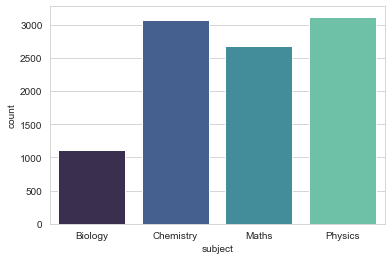

In [231]:
#visualizing the distrubution
sns.countplot(final_df["subject"],palette="mako");

In [188]:
#count of all words
all_words=" ".join(final)
words_df=FreqDist(all_words.split()) 
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
#displayng only highest count 30 words
words_df.nlargest(columns="count",n=30)

,word,count
119,frac,4417
98,cdot,3950
143,mathbf,3805
95,right,2287
142,left,2258
202,correct,1862
248,time,1592
196,reason,1581
191,assertion,1540
9,following,1340


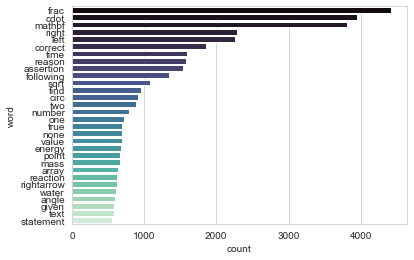

In [232]:
#ploting the count of the words
sns.barplot(x="count",y="word",data=words_df.nlargest(columns="count",n=30),palette="mako");

By seeing the graph we can that the word "frac" have in highest count followed by the word "mathrm"

WORD CLOUD

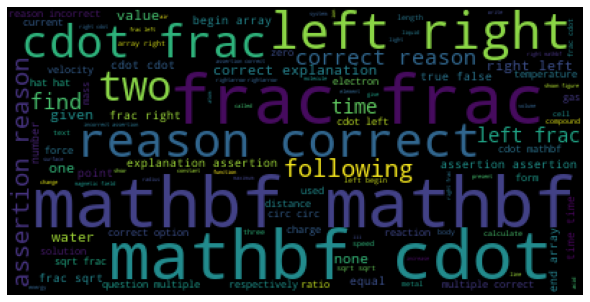

In [190]:
#word_cloud fpr all the words
wordcloud=WordCloud().generate(all_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0) 

In [191]:
#word cloud for PHYSICS question
physcis_ques=final_df[final_df["subject"]=="Physics"]
all_words_physcis=physcis_ques["questions"].values.tolist()
all_words_physcis=" ".join(all_words_physcis)
all_words_physcis=all_words_physcis

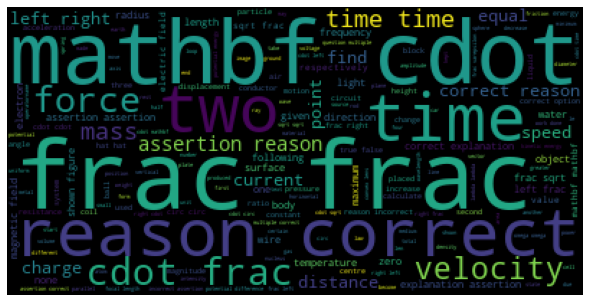

In [192]:
wordcloud=WordCloud().generate(all_words_physcis)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0) 

In [193]:
#word cloud for CHEMISTRY question
chem_ques=final_df[final_df["subject"]=="Chemistry"]
all_words_chem=chem_ques["questions"].values.tolist()
all_words_chem=" ".join(all_words_chem)

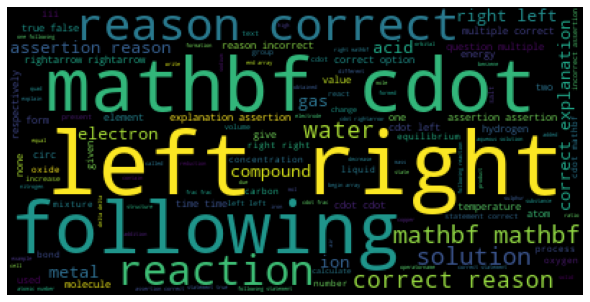

In [194]:
wordcloud=WordCloud().generate(all_words_chem)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0) 

In [195]:
#word cloud for MATHS question
maths_ques=final_df[final_df["subject"]=="Maths"]
all_words_maths=maths_ques["questions"].values.tolist()
all_words_maths=" ".join(all_words_maths)

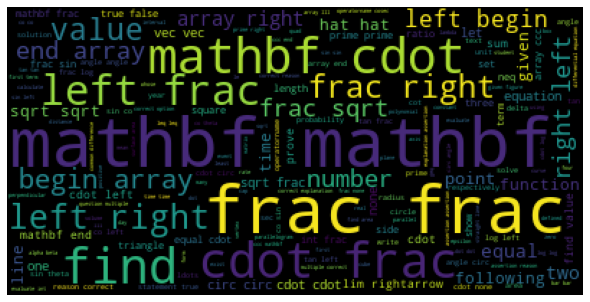

In [196]:
wordcloud=WordCloud().generate(all_words_maths)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0) 

In [197]:
#word cloud for BIOLOGY question
bio_ques=final_df[final_df["subject"]=="Biology"]
all_words_bio=bio_ques["questions"].values.tolist()
all_words_bio=" ".join(all_words_bio)

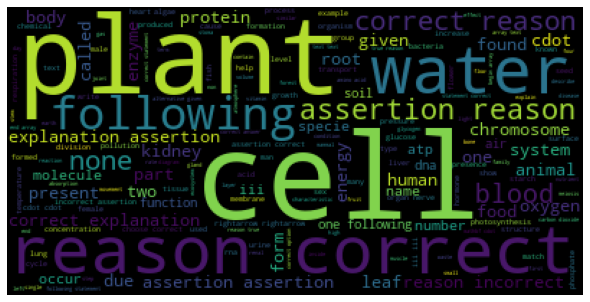

In [198]:
wordcloud=WordCloud().generate(all_words_bio)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0) 

BAG OF WORDS

In [199]:
count_vector=CountVectorizer(binary=False)
bag_of_words=count_vector.fit_transform(final)
features=count_vector.get_feature_names() ##---->geting the unique words(features)
print("No of features: ",len(features))

No of features:  11152


In [200]:
bag_of_words_df=pd.DataFrame(bag_of_words.toarray(),columns=features)
bag_of_words_df

,00,000,000009,00018,0003,0003125,000434,0005,0006032,0008,...,zoospore,zrand,zwitter,zygomorphic,zygomycetes,zygospore,zygote,zygotene,zymase,zymogen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# VECTORIZATION

In [201]:
#vectorizing using tfidf
vectorizer=TfidfVectorizer(max_features=2500)
vectors=vectorizer.fit_transform(final)  #final_df["questions"]
feature_names=vectorizer.get_feature_names()
vectors.shape

(9996, 2500)

In [202]:
tf_df=pd.DataFrame(vectors.toarray(),columns=feature_names)
tf_df

,000,001,023,100,1000,101,104,105,106,108,...,year,yellow,yes,yet,yield,young,zero,zinc,zrand,zygote
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.28097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# DATA SPLITTING

In [203]:
#splitting the data (3 way split(train,validation,test))
x=vectors.toarray()
y=final_df["subject"].map({"Physics" : 1, "Chemistry" : 2,"Maths" : 3,"Biology" : 4}).values

In [204]:
#splitting to train and test
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.10,random_state=7)

In [205]:
#taking validation data from training data
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,random_state=7,test_size=0.10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x_valid.shape)
print(y_valid.shape)

(8096, 2500)
(1000, 2500)
(8096,)
(1000,)
(900, 2500)
(900,)


# MODEL FITTING

MULTINOMIAL MODEL (LOGISTIC REGRESSION)

In [206]:
log=LogisticRegression(multi_class="multinomial")
log.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [207]:
# #scaling the data
# scaler=StandardScaler()
# scaler.fit(x_train)
# scaler.fit(x_valid)

# x_train=scaler.transform(x_train)
# x_test=scaler.transform(x_test)
# x_valid=scaler.transform(x_valid)

K NEAREST NEIGHBHOR MODEL

In [208]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [209]:
#choosing the best k value
iteration_knn=[]
aucroc_knn=[]
for i in range(3,21):
    knn_ht=KNeighborsClassifier(n_neighbors=i)
    knn_ht.fit(x_train,y_train)
    y_probha_knn_ht=knn_ht.predict_proba(x_valid)
    aucroc=roc_auc_score(y_valid,y_probha_knn_ht,multi_class="ovr")
    aucroc_knn.append(aucroc)
    iteration_knn.append(i)
knn_ht_vals=dict(zip(iteration_knn,aucroc_knn))
print(knn_ht_vals)

{3: 0.7816447709999068, 4: 0.7928240605394468, 5: 0.7884388671075064, 6: 0.7786141254974155, 7: 0.7733859194267476, 8: 0.770016016581796, 9: 0.77202956659435, 10: 0.7702811167724926, 11: 0.7689593003206854, 12: 0.7659783430797921, 13: 0.7630578657457738, 14: 0.7628985193077114, 15: 0.7620342074709328, 16: 0.7660393379998421, 17: 0.7681019344038891, 18: 0.7619084565385039, 19: 0.7658278483119371, 20: 0.7685253218788368}


In [210]:
max_knnval=max(knn_ht_vals.values())
position=list(knn_ht_vals.values()).index(max_knnval)
ht_value=list(knn_ht_vals.keys())
print("The hyper tuned k value with high aucroc score is:",ht_value[position],"with the aucroc score:",max_knnval)

The hyper tuned k value with high aucroc score is: 4 with the aucroc score: 0.7928240605394468


In [211]:
#fitting the knn model with the best k value 
knnn=KNeighborsClassifier(n_neighbors=4)
knnn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

DESCION TREE MODEL

In [212]:
dtree=DecisionTreeClassifier(max_depth=2)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [213]:
#finding the best hyper parameter(max_depth) 
iteration_dt=[]
aucroc_dt=[]
for i in range(3,21):
    dt_ht=DecisionTreeClassifier(max_depth=i)
    dt_ht.fit(x_train,y_train)
    y_probha_dt_ht=dt_ht.predict_proba(x_valid)
    aucroc=roc_auc_score(y_valid,y_probha_dt_ht,multi_class="ovr")
    aucroc_dt.append(aucroc)
    iteration_dt.append(i)
dt_ht_vals=dict(zip(iteration_dt,aucroc_dt))
print(dt_ht_vals)

{3: 0.6568311533913045, 4: 0.6785652919169077, 5: 0.6950122034050273, 6: 0.7130095042298421, 7: 0.7250442209409211, 8: 0.7396623497009661, 9: 0.7455013055887482, 10: 0.7557230696143855, 11: 0.7598694879249432, 12: 0.7656326130030351, 13: 0.7767691345809042, 14: 0.7786549585499917, 15: 0.7806987202228528, 16: 0.7847743270191022, 17: 0.7947091373355328, 18: 0.8009706234096088, 19: 0.800690038437287, 20: 0.806708680488966}


In [214]:
max_dt_val=max(dt_ht_vals.values())
position=list(dt_ht_vals.values()).index(max_dt_val)
ht_value=list(dt_ht_vals.keys())
print("The hyper tuned k value with high aucroc score is:",ht_value[position],"with the aucroc score:",max_dt_val)

The hyper tuned k value with high aucroc score is: 20 with the aucroc score: 0.806708680488966


In [215]:
#fiting the descion tree model wwith the best ma_depth value 20
dt=DecisionTreeClassifier(max_depth=20)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20)

RANDOM FOREST MODEL

In [216]:
# max_dept=log2(number of features)
dept=round(math.log2(len(x_train)))
rf=RandomForestClassifier(n_estimators=50,max_features="sqrt",max_depth=10)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=50)

# MODEL VALIDATION

CHOOSING THE BEST MODEL

In [217]:
#predicting the probhability of the models
log_probha=log.predict_proba(x_valid)
knn_probha=knn.predict_proba(x_valid)
dt_probha=dt.predict_proba(x_valid)
rf_probha=rf.predict_proba(x_valid)

In [218]:
#findig auc_roc scores for all the models and choosing the best
auc_roc_scores=[]
for i in [log_probha,knn_probha,dt_probha,rf_probha]:
    auc_roc=roc_auc_score(y_valid,i,multi_class="ovr")
    auc_roc_scores.append(auc_roc)
 
model=["log_probha","knn_probha","dt_probha","rf_probha"]
for j in range(len(model)):
    print("The auc_roc score of ",model[j],"is ",auc_roc_scores[j])

The auc_roc score of  log_probha is  0.97677194298479
The auc_roc score of  knn_probha is  0.7816447709999068
The auc_roc score of  dt_probha is  0.8132074892709136
The auc_roc score of  rf_probha is  0.9227470351254395



Then auc_roc score for the model LOGISTIC REGRESSION is high with the score 0.97, So we use LOGISTIC REGRESSION for TESTING

# MODEL EVALUATION

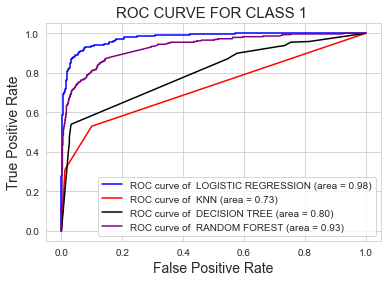

In [219]:
#plotting auc-roc curve for class 1 (PHYSICS)
y_val_bin = label_binarize(y_valid, classes=[1,2,3,4])
n_classes = y_val_bin.shape[1]

no_algo = 4
colors = ['blue', 'red', 'black','purple']
algo_list=['LOGISTIC REGRESSION','KNN','DECISION TREE','RANDOM FOREST']
fpr=dict()
tpr=dict()
roc_auc_class1=dict()


fpr[0], tpr[0], _ = roc_curve(y_val_bin[:, 0], log_probha[:, 0])
roc_auc_class1[0] = auc(fpr[0], tpr[0])
fpr[1], tpr[1], _ = roc_curve(y_val_bin[:, 0], knn_probha[:, 0])
roc_auc_class1[1] = auc(fpr[1], tpr[1])
fpr[2], tpr[2], _ = roc_curve(y_val_bin[:, 0], dt_probha[:, 0])
roc_auc_class1[2] = auc(fpr[2], tpr[2])
fpr[3], tpr[3], _ = roc_curve(y_val_bin[:, 0], rf_probha[:, 0])
roc_auc_class1[3] = auc(fpr[3], tpr[3])


plt.figure()
# plt.figure(figsize=(15,10))

for i, color in zip(range(no_algo), colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of  {0} (area = {1:0.2f})' 
              ''.format( algo_list[i], roc_auc_class1[i]))
    
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC CURVE FOR CLASS 1 ',fontsize=15)
plt.legend(loc="lower right")
plt.show()

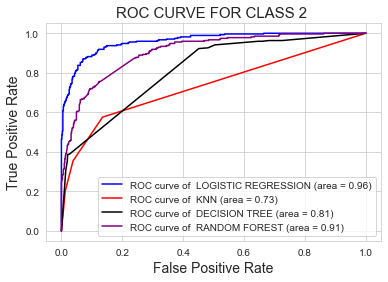

In [220]:
#plotting auc-roc curve for class 2 (CHEMISTRY)
fpr=dict()
tpr=dict()
roc_auc_class2=dict()


fpr[0], tpr[0], _ = roc_curve(y_val_bin[:, 1], log_probha[:, 1])
roc_auc_class1[0] = auc(fpr[0], tpr[0])
fpr[1], tpr[1], _ = roc_curve(y_val_bin[:, 1], knn_probha[:, 1])
roc_auc_class1[1] = auc(fpr[1], tpr[1])
fpr[2], tpr[2], _ = roc_curve(y_val_bin[:, 1], dt_probha[:, 1])
roc_auc_class1[2] = auc(fpr[2], tpr[2])
fpr[3], tpr[3], _ = roc_curve(y_val_bin[:, 1], rf_probha[:, 1])
roc_auc_class1[3] = auc(fpr[3], tpr[3])


plt.figure()
# plt.figure(figsize=(15,10))

for i, color in zip(range(no_algo), colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of  {0} (area = {1:0.2f})' 
              ''.format( algo_list[i], roc_auc_class1[i]))
    
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC CURVE FOR CLASS 2 ',fontsize=15)
plt.legend(loc="lower right")
plt.show()

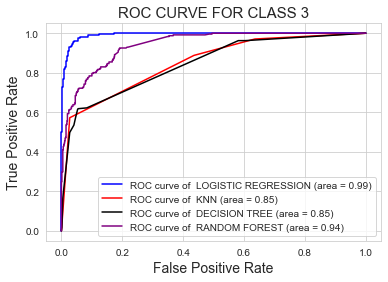

In [221]:
#plotting auc-roc curve for class 3 (MATHS)
fpr=dict()
tpr=dict()
roc_auc_class3=dict()


fpr[0], tpr[0], _ = roc_curve(y_val_bin[:, 2], log_probha[:, 2])
roc_auc_class1[0] = auc(fpr[0], tpr[0])
fpr[1], tpr[1], _ = roc_curve(y_val_bin[:, 2], knn_probha[:, 2])
roc_auc_class1[1] = auc(fpr[1], tpr[1])
fpr[2], tpr[2], _ = roc_curve(y_val_bin[:, 2], dt_probha[:, 2])
roc_auc_class1[2] = auc(fpr[2], tpr[2])
fpr[3], tpr[3], _ = roc_curve(y_val_bin[:, 2], rf_probha[:, 2])
roc_auc_class1[3] = auc(fpr[3], tpr[3])


plt.figure()
# plt.figure(figsize=(15,10))

for i, color in zip(range(no_algo), colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of  {0} (area = {1:0.2f})' 
              ''.format( algo_list[i], roc_auc_class1[i]))
    
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC CURVE FOR CLASS 3',fontsize=15)
plt.legend(loc="lower right")
plt.show()

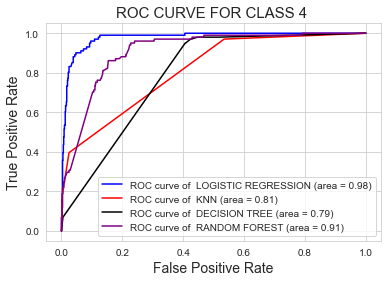

In [222]:
#plotting auc-roc curve for class 4 (BIOLOGY)
fpr=dict()
tpr=dict()
roc_auc_class4=dict()


fpr[0], tpr[0], _ = roc_curve(y_val_bin[:, 3], log_probha[:, 3])
roc_auc_class1[0] = auc(fpr[0], tpr[0])
fpr[1], tpr[1], _ = roc_curve(y_val_bin[:, 3], knn_probha[:, 3])
roc_auc_class1[1] = auc(fpr[1], tpr[1])
fpr[2], tpr[2], _ = roc_curve(y_val_bin[:, 3], dt_probha[:, 3])
roc_auc_class1[2] = auc(fpr[2], tpr[2])
fpr[3], tpr[3], _ = roc_curve(y_val_bin[:, 3], rf_probha[:, 3])
roc_auc_class1[3] = auc(fpr[3], tpr[3])


plt.figure()
# plt.figure(figsize=(15,10))

for i, color in zip(range(no_algo), colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of  {0} (area = {1:0.2f})' 
              ''.format( algo_list[i], roc_auc_class1[i]))
    
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC CURVE FOR CLASS 4 ',fontsize=15)
plt.legend(loc="lower right")
plt.show()

# TESTING MODEL

In [223]:
#logistic regeression model
log_model=LogisticRegression(multi_class="multinomial")
log_model.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [224]:
#predicting auc_roc score for logidtic regression model using TEST data
y_probha_log=log_model.predict_proba(x_test)
auc_roc_score=roc_auc_score(y_test,y_probha_log,multi_class="ovr")
print("auc roc score of LOGISTIC REGRESSION model is: ",auc_roc_score)

auc roc score of LOGISTIC REGRESSION model is:  0.9738052596753656


In [225]:
#predicting the accuracy of logistic regression model
y_pred=log_model.predict(x_test)
score=accuracy_score(y_test,y_pred)
print("Accuracy of the LOGISTIC REGRESSION model is: ",score)

Accuracy of the LOGISTIC REGRESSION model is:  0.881


In [226]:
#finding the f1score of logistic regression model
f1_score_log=f1_score(y_test,y_pred,average="macro")
print("F1_score for LOGISTIC REGRESSION model is: ",f1_score_log)

F1_score for LOGISTIC REGRESSION model is:  0.8712622582187406


# MODEL DEPLOMENT

In [227]:
#getting question from the user and predicting the subject
question=input()
vectors=vectorizer.transform([question]).toarray()
ques_subject=log_model.predict(vectors)


# 'The sides of a right angled triangle are in A.P. The ratio of sides is\nA .1: 2: 3\nB. 2:3:4\n\\( c \\cdot 3: 4: 5 \\)\n\\( D \\cdot 5: 8: 3 \\)'


In [230]:
if ques_subject[0]==1:
    print("The question entered belong to the subject PHYSICS")

if ques_subject[0]==2:
    print("The question entered belong to the subject CHEMISTRY")
    
if ques_subject[0]==3:
    print("The question entered belong to the subject MATHS")
    
if ques_subject[0]==4:
    print("The question entered belong to the subject BIOLOGY")

The question entered belong to the subject MATHS


In [229]:
# 'The sides of a right angled triangle are in A.P. The ratio of sides is\nA .1: 2: 3\nB. 2:3:4\n\\( c \\cdot 3: 4: 5 \\)\n\\( D \\cdot 5: 8: 3 \\)'